# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.104467e+01     6.820886e+00
 * time: 0.00429081916809082
     1     2.812043e+01     4.060307e+00
 * time: 0.012570858001708984
     2     2.059401e+01     5.587072e+00
 * time: 0.032800912857055664
     3     1.347959e+01     1.793809e+00
 * time: 0.05747389793395996
     4     1.261892e+01     3.315764e+00
 * time: 0.07386589050292969
     5     1.181432e+01     1.872567e+00
 * time: 0.09021282196044922
     6     1.049795e+01     2.225843e+00
 * time: 0.1065528392791748
     7     9.788524e+00     8.080105e-01
 * time: 0.18289995193481445
     8     9.393269e+00     8.575744e-01
 * time: 0.19876384735107422
     9     9.252743e+00     4.910853e-01
 * time: 0.21465182304382324
    10     9.195946e+00     3.670234e-01
 * time: 0.23060989379882812
    11     9.185707e+00     6.914548e-01
 * time: 0.24241089820861816
    12     9.134332e+00     5.304918e-01
 * time: 0.25404787063598633
    13     9.105481e+00     4.007879e-01
 * time

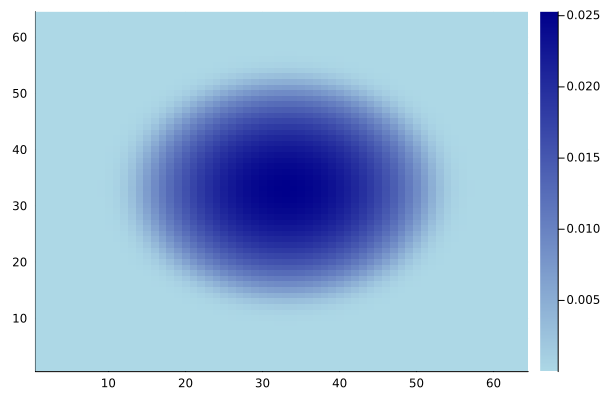

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)